In [6]:
import numpy as np
import matplotlib.pyplot as plt


In [7]:
spk_mat = np.load('spk_mat.npy')

In [ ]:
def individual_entropy(neuron):
    spike_prob = np.count_nonzero(neuron)/len(neuron) # probability of spiking in 100 ms
    no_spike_prob = 1-spike_prob # probability of not spiking
    # entropy at each sample summed (multiplied by the number of samples, cause the entropy for each sample is the same)
    H = len(neuron)*(-spike_prob*np.log2(spike_prob)-no_spike_prob*np.log2(no_spike_prob))  
    return H

In [ ]:
H_individual = dict()
H_network = 0
# calculate entropy for each neuron and sum it to the mutual entropy (assuming independence)
for i, neuron in enumerate(spk_mat):
    i+=1
    H_individual[i] = individual_entropy(neuron).astype(int)
    H_network+=H_individual[i]

print(f"The entropy for each neuron: \n {H_individual} \n " \
f"Mutual entropy assuming independence: {H_network}")

The entropy for each neuron: 
 {1: np.int64(71427), 2: np.int64(67650), 3: np.int64(65721), 4: np.int64(62159), 5: np.int64(61349), 6: np.int64(59709), 7: np.int64(62639), 8: np.int64(63333)} 
 Mutual entropy assuming independence: 513987


(array([-71999, -71998, -71997, ...,  71997,  71998,  71999],
       shape=(143999,)),
 array([0.00000000e+00, 4.71137957e-05, 4.71137957e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00], shape=(143999,)),
 <matplotlib.lines.Line2D at 0x1c81dad7d10>)

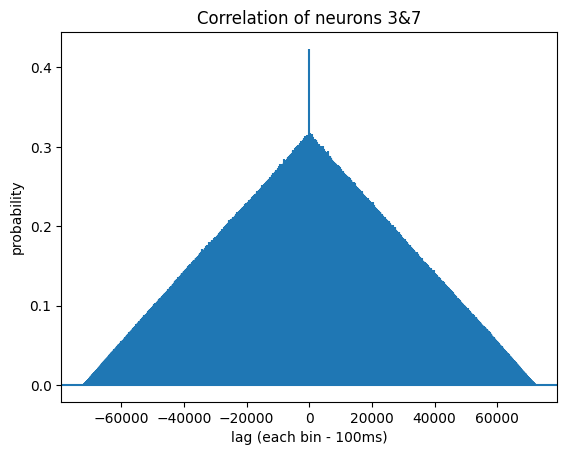

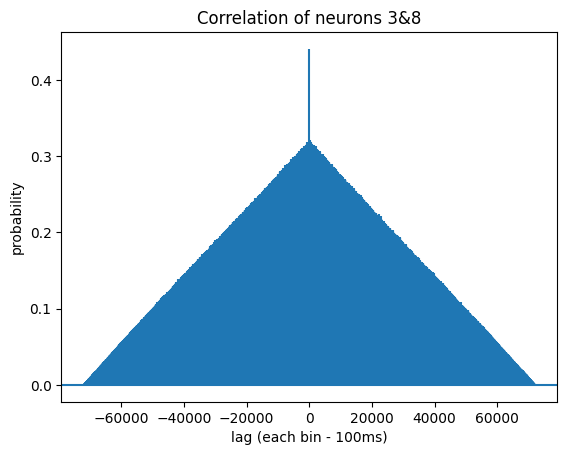

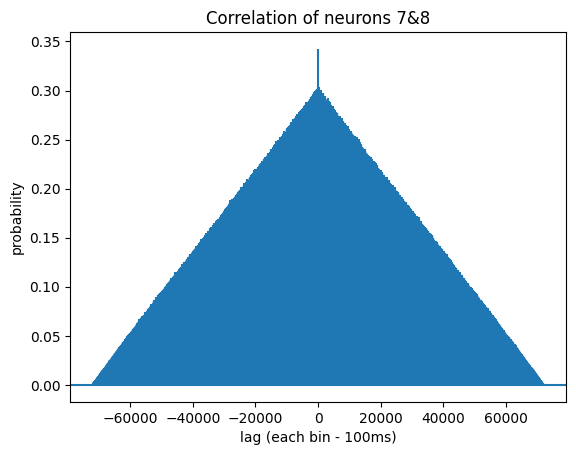

In [ ]:
# check the correlations between the 3 neurons (3, 7, 8) and plot then, 
# to see whether the neurons are correlated at lag 0 or there is some lag of the reaction of 
# one neuron following the other
plt.figure()
plt.title('Correlation of neurons 3&7')
plt.xlabel('lag (each bin - 100ms)')
plt.ylabel('probability')
plt.xcorr(spk_mat[2], spk_mat[6], maxlags=None)
plt.figure()
plt.title('Correlation of neurons 3&8')
plt.xlabel('lag (each bin - 100ms)')
plt.ylabel('probability')
plt.xcorr(spk_mat[2], spk_mat[7], maxlags=None)
plt.figure()
plt.title('Correlation of neurons 7&8')
plt.xlabel('lag (each bin - 100ms)')
plt.ylabel('probability')
plt.xcorr(spk_mat[6], spk_mat[7], maxlags=None)

In [139]:
def mutual_info(neuron1, neuron2):
    H_mutual = 0
    
    H1 = np.round(individual_entropy(neuron1))
    H2 = np.round(individual_entropy(neuron2))
    concat = np.transpose(np.vstack((neuron1,neuron2))) #concatenate the neurons
    # create the matrix of possible patterns for two neurons:
    patterns = np.transpose(np.vstack(([0, 1, 0, 1],[0, 0, 1, 1]))) 
    for pattern in patterns:
        count = 0
        for row in concat:
            if np.array_equal(pattern, row): 
                count+=1 # count how mant times a pattern occurred to calculate it's probability
        p_x_y = count/concat.shape[0] # the probability of a mutual pattern to occur
        H_mutual+=-len(neuron1)*p_x_y*np.log2((p_x_y))
    I_mutual = H1+H2-H_mutual
    return I_mutual, H_mutual   

In [140]:
I_mutual, H_mutual = mutual_info(spk_mat[6], spk_mat[7])
print(f"The mutual information of neurons 7 and 8: {I_mutual}")
I_mutual, H_mutual = mutual_info(spk_mat[2], spk_mat[7])
print(f"The mutual information of neurons 3 and 8: {I_mutual}")
I_mutual, H_mutual = mutual_info(spk_mat[2], spk_mat[6])
print(f"The mutual information of neurons 3 and 7: {I_mutual}")


The mutual information of neurons 7 and 8: 232.37978709065646
The mutual information of neurons 3 and 8: 1755.1035368723678
The mutual information of neurons 3 and 7: 1388.6670228055737
